# Cancer & Heart Disease Death Rates

In this project we are trying to predict cancer and heart disease death rates for each of the 50 US States for 2019. In this notebook, we will focus on both cancer and heart disease death rates, but we will be using the previous years' death rates as features - where in our other notebooks we dropped them in order to focus more on the other features. We want to know which of our many features have the highest impacts on predicting the death rates, and if we can find any interesting and possibly non-traditional relationships that we may not have expected. In these models however, we will focus on getting the best models with the most accurate predictions.

In [1]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd
from shapely.geometry import Point, Polygon
# import geoplot
%matplotlib inline
import statsmodels.api as sm
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import (AdaBoostRegressor, BaggingRegressor, 
                              RandomForestRegressor)
from sklearn.svm import SVR, LinearSVR
from sklearn.metrics import (accuracy_score, confusion_matrix, 
                             mean_squared_error, plot_confusion_matrix, 
                             precision_score, r2_score, recall_score,
                             f1_score)
import sklearn.metrics as metrics
# from tensorflow.keras.regularizers import l2
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Dense, Dropout, GRU
# from tensorflow.keras.optimizers import Adam
# from tensorflow.keras.callbacks import EarlyStopping

import glob

## Loading the data

In [2]:
# importing all datasets
# code from https://stackoverflow.com/questions/20906474/import-multiple-csv-files-into-pandas-and-concatenate-into-one-dataframe
# code from https://stackoverflow.com/questions/14984119/python-pandas-remove-duplicate-columns

# path = r'./datasets'
# datasets = glob.glob(path + "/*.csv")

# datalist = []
# for data in datasets:
#     dataset = pd.read_csv(data, index_col=None, header=0)
#     if 'state' in dataset.columns:
#         dataset.rename(columns={'state': 'State'}, inplace=True)
#     elif 'STATE' in dataset.columns:
#         dataset.rename(columns={'STATE': 'State'}, inplace=True)
    
#     if 'State' in dataset.columns:
#         if 'District of Columbia' in dataset.loc[:,'State']:
#             dataset = dataset[dataset['State'] != 'District of Columbia']
#     datalist.append(dataset)
    
# df = pd.concat(datalist, axis=1, join='inner', sort=True)
# df = df.loc[:,~df.columns.duplicated()]
# df.drop(columns=['Unnamed: 0', 'fips', 'StateFIPS', 'Primacy Agency Code'], inplace=True)
df = pd.read_csv('data_master.csv')

In [3]:
df.shape

(50, 597)

## EDA

In [4]:
df.drop(columns='Unnamed: 0', inplace=True)
df

,State,personal_health_spend_Y2005,personal_health_spend_Y2006,personal_health_spend_Y2007,personal_health_spend_Y2008,personal_health_spend_Y2009,state_abrv,cancer_incidence_rate_age_adj,cancer_incidence_ranking_HighToLow,2016_2011_PC_FFRPTH,...,dental_spend_Y2005,dental_spend_Y2006,dental_spend_Y2007,dental_spend_Y2008,dental_spend_Y2009,other_prof_services_spend_Y2005,other_prof_services_spend_Y2006,other_prof_services_spend_Y2007,other_prof_services_spend_Y2008,other_prof_services_spend_Y2009
0,Alabama,5635.737,6648.616,7030.018,7538.214,7972.104,AL,450.8,33,0.068817,...,0.640,1.556,3.535,3.623,2.033,116.438,130.874,147.478,170.838,204.761
1,Alaska,342.136,384.365,401.586,443.913,504.044,AK,418.6,41,0.033979,...,0.023,0.018,0.021,0.023,0.029,11.215,8.513,9.258,10.518,13.717
2,Arizona,5773.851,6811.382,7417.659,8057.845,8641.816,AZ,385.7,50,0.003400,...,3.613,4.493,6.560,10.204,11.520,208.261,241.365,264.979,292.341,330.047
3,Arkansas,3176.964,3752.930,4067.266,4302.598,4545.438,AR,479.0,10,0.054014,...,0.222,0.339,0.663,1.916,2.634,75.804,85.010,96.754,107.716,115.127
4,California,34486.349,39998.952,42147.076,47210.423,50688.904,CA,402.4,46,-0.008852,...,14.614,13.318,17.336,21.753,31.648,1251.606,1286.609,1339.904,1559.685,1667.927
5,Colorado,3679.335,4287.357,4562.180,4913.168,5312.038,CO,396.6,49,-0.016252,...,1.248,1.485,2.369,2.760,6.703,134.062,142.009,148.226,159.063,178.280
6,Connecticut,4460.572,5203.213,5478.748,5852.508,6149.347,CT,465.1,22,0.109733,...,0.663,0.686,1.036,1.331,1.381,129.786,141.140,155.535,174.280,182.368
7,Delaware,943.646,1099.528,1209.189,1362.279,1439.996,DE,479.6,8,0.001432,...,0.073,0.102,0.193,0.193,0.193,28.284,30.977,34.368,38.880,43.636
8,Florida,27377.170,31942.678,33870.369,36954.250,39457.081,FL,460.2,24,0.023935,...,16.520,17.592,24.580,32.797,47.168,890.869,979.322,1022.917,1151.273,1365.605
9,Georgia,7700.386,9441.601,10136.239,10906.846,11803.691,GA,468.5,16,0.066771,...,0.740,1.163,2.144,3.971,5.845,143.356,170.701,199.389,231.243,282.865


In [5]:
df.isna().sum().sort_values()

State                              0
PCT_OBESE_ADULTS20                 0
PCT_OBESE_ADULTS14                 0
2019_cancer_death_rate             0
2018_cancer_death_rate             0
                                  ..
2010_Days Ozone                    0
2011_Days Ozone                    0
2012_Days Ozone                    0
2014_Days Ozone                    0
other_prof_services_spend_Y2009    0
Length: 596, dtype: int64

In [6]:
df['averageAnnualSunlight(kj/m^2)']

0     5755.0
1     5642.0
2     5296.0
3     5137.0
4     5050.0
5     4960.0
6     4912.0
7     4890.0
8     4887.0
9     4859.0
10    4725.0
11    4724.0
12    4693.0
13    4685.0
14    4661.0
15    4660.0
16    4624.0
17    4545.0
18    4486.0
19    4471.0
20    4466.0
21    4383.0
22    4380.0
23    4354.0
24    4332.0
25    4331.0
26    4318.0
27    4267.0
28    4251.0
29    4232.0
30    4146.0
31    4139.0
32    4056.0
33    4023.0
34    4018.0
35    3989.0
36    3988.0
37    3968.0
38    3944.0
39    3939.0
40    3925.0
41    3904.0
42    3891.0
43    3847.0
44    3830.0
45    3826.0
46    3815.0
47    3467.0
48       0.0
49       0.0
Name: averageAnnualSunlight(kj/m^2), dtype: float64

In [7]:
df.fillna(0, inplace=True)

In [8]:
# df_features = pd.get_dummies(df, columns=['State'], drop_first=True)

In [9]:
list(df.columns)

['State',
 'personal_health_spend_Y2005',
 'personal_health_spend_Y2006',
 'personal_health_spend_Y2007',
 'personal_health_spend_Y2008',
 'personal_health_spend_Y2009',
 'state_abrv',
 'cancer_incidence_rate_age_adj',
 'cancer_incidence_ranking_HighToLow',
 '2016_2011_PC_FFRPTH',
 '2016_2011_PC_FSRPTH',
 'home_care_spend_Y2005',
 'home_care_spend_Y2006',
 'home_care_spend_Y2007',
 'home_care_spend_Y2008',
 'home_care_spend_Y2009',
 '2015_2017_to_2012_2014_PC_FOODINSEC',
 '2015_2017_to_2012_2014_PC_VLFOODSEC',
 '2005_Good Days',
 '2006_Good Days',
 '2007_Good Days',
 '2008_Good Days',
 '2009_Good Days',
 '2010_Good Days',
 '2011_Good Days',
 '2012_Good Days',
 '2013_Good Days',
 '2014_Good Days',
 '2015_Good Days',
 '2016_Good Days',
 '2017_Good Days',
 '2018_Good Days',
 '2019_Good Days',
 '2020_Good Days',
 '2005_Moderate Days',
 '2006_Moderate Days',
 '2007_Moderate Days',
 '2008_Moderate Days',
 '2009_Moderate Days',
 '2010_Moderate Days',
 '2011_Moderate Days',
 '2012_Moderate Day

In [10]:
health_issue_list = ['state_abrv',
                     '2019_CANCER_DEATH_RATE',
                     '2019_HEART_DISEASE_DEATH_RATE']

df[health_issue_list].head()

,state_abrv,2019_CANCER_DEATH_RATE,2019_HEART_DISEASE_DEATH_RATE
0,AL,160.8,219.6
1,AK,146.9,129.7
2,AZ,131.1,134.0
3,AR,165.7,226.5
4,CA,131.6,136.9


## Cancer - Feature Engineering and Selection

In [11]:
df = df.drop(columns=health_issue_list)
df
cancer_corr = df.corr()['2019_cancer_death_rate']
cancer_corr

personal_health_spend_Y2005       -0.150213
personal_health_spend_Y2006       -0.147772
personal_health_spend_Y2007       -0.147940
personal_health_spend_Y2008       -0.151280
personal_health_spend_Y2009       -0.152356
                                     ...   
other_prof_services_spend_Y2005   -0.245519
other_prof_services_spend_Y2006   -0.239509
other_prof_services_spend_Y2007   -0.230081
other_prof_services_spend_Y2008   -0.226745
other_prof_services_spend_Y2009   -0.216655
Name: 2019_cancer_death_rate, Length: 590, dtype: float64

In [12]:
# Creating a df of top positive and negative correlations with '2019_cancer_death_rate' (our target)

cancer_corr_dict = {}
for index, corr in cancer_corr.items():
    if corr > 0.7 or corr < -0.5:
        cancer_corr_dict[index] = corr
        
cancer_corr = pd.DataFrame(cancer_corr_dict.items(), columns=['Id', 'corr']).set_index('Id')
cancer_corr.sort_values(by='corr', ascending=False)

,corr
Id,
2019_cancer_death_rate,1.000000
2015_cancer_death_rate,0.974561
2014_cancer_death_rate,0.972285
2018_cancer_death_rate,0.970220
2017_cancer_death_rate,0.968052
2016_cancer_death_rate,0.963418
Percent_smokers_2018,0.835629
2020_high_blood_pressure_score,0.834246
PCT_OBESE_ADULTS12,0.829674


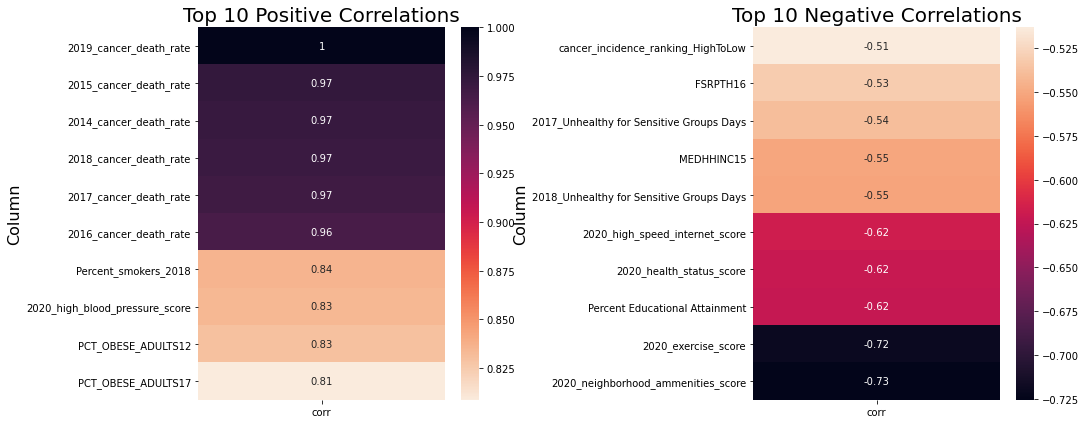

In [13]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax = plt.subplot(1, 2, 1)
ax = sns.heatmap(data=cancer_corr.sort_values(by='corr', ascending=False)[:10],
                 annot=True,
                 cmap='rocket_r')
ax.set_title('Top 10 Positive Correlations', size=20)
ax.set_ylabel('Column', size=16)
ax2 = plt.subplot(1, 2, 2)
ax2 = sns.heatmap(data=cancer_corr.sort_values(by='corr', ascending=False)[-10:],
                  annot=True,
                  cmap='rocket')
ax2.set_title('Top 10 Negative Correlations', size=20)
ax2.set_ylabel('Column', size=16)
fig.tight_layout()

plt.savefig('charts/cancer_corr_with_death_rates.png', bbox_inches='tight');

In [14]:
cancer_corr.drop(index='2019_cancer_death_rate', inplace=True)
features = list(cancer_corr.index)

In [15]:
# cancer model
X = df[features]
y = df['2019_cancer_death_rate']

In [16]:
poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

X_poly = pd.DataFrame(data=X_poly, columns = poly.get_feature_names(features))
X_poly['2019_cancer_death_rate'] = y

In [17]:
# getting only highest correlated features from our new polynomial X_poly
cancer_corr_poly = X_poly.corr()['2019_cancer_death_rate']

cancer_corr_poly_dict = {}
for index, corr in cancer_corr_poly.items():
    if corr > 0.81 or corr < -0.72:
        cancer_corr_poly_dict[index] = corr
        
cancer_corr_poly_df = pd.DataFrame(cancer_corr_poly_dict.items(), columns=['Id', 'corr']).set_index('Id')
cancer_corr_poly_df.sort_values(by='corr', ascending=False)

,corr
Id,
2019_cancer_death_rate,1.000000
2018_cancer_death_rate 2014_cancer_death_rate,0.978769
2017_cancer_death_rate 2014_cancer_death_rate,0.978184
2018_cancer_death_rate 2015_cancer_death_rate,0.977779
2017_cancer_death_rate 2015_cancer_death_rate,0.977334
...,...
2017 heart_disease_death_rate 2020_neighborhood_ammenities_score Percent_smokers_2018,-0.769362
2014 heart_disease_death_rate 2020_neighborhood_ammenities_score Percent_smokers_2018,-0.769367
2016 heart_disease_death_rate 2020_neighborhood_ammenities_score Percent_smokers_2018,-0.769914


In [18]:
cancer_corr_poly_df.drop(index='2019_cancer_death_rate', inplace=True)
features = list(cancer_corr_poly_df.index)

## Cancer Death Rates - Modeling

In [19]:
X = X_poly[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [20]:
X_train.shape

(37, 1556)

In [21]:
count = 0
model_params = {}

In [22]:
def modeling_grid(model, X_train, X_test, y_train, y_test, params, cv_n, model_params, count):
    
    model_params = model_params
    count = count
    
    grid = GridSearchCV(model,
                    param_grid=params,
                    cv=cv_n,
                    verbose=1)

    grid.fit(X_train, y_train)
    
    train_preds = grid.predict(X_train)
    test_preds = grid.predict(X_test)

    count += 1

    grid.best_params_['estimator'] = grid.estimator
    grid.best_params_['train_score'] = grid.score(X_train, y_train)
    grid.best_params_['test_score'] = grid.score(X_test, y_test)
    grid.best_params_['score'] = grid.best_score_
    grid.best_params_['train_rmse'] = mean_squared_error(y_train, train_preds)**0.5
    grid.best_params_['test_rmse'] = mean_squared_error(y_test, test_preds)**0.5
    model_params[f'model_{count}'] = grid.best_params_

    model_df = pd.DataFrame(model_params, columns=model_params.keys()).T
    
    grid_estimator = grid.best_estimator_

    return (model_df, grid_estimator, count)

In [23]:
lr = LinearRegression()

params = {
    'normalize': ['True', 'False']
}

model_df, grid_estimator_lr, count = modeling_grid(lr, Z_train, Z_test, y_train, y_test, params, 5, model_params, count)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.1s finished


In [24]:
print(count)

model_df

1


,estimator,normalize,score,test_rmse,test_score,train_rmse,train_score
model_1,LinearRegression(),True,0.634949,3.090599,0.907029,0.0,1.0


In [25]:
# transforming using PCA
pipe = Pipeline([
    ('sc', StandardScaler()),
    ('pca', PCA(n_components=7)),
    ('lr', LinearRegression())
])

# pca = PCA(n_components=6, random_state=42)
# P_train = pca.fit_transform(Z_train)
# P_test = pca.transform(Z_test)

# instantiating and fitting a Linear Regression model
# ols = LinearRegression()

params = {
    'lr__normalize': ['True', 'False'],
    'pca__tol': np.linspace(0.001, 0.4, 6)
}

model_df, grid_estimator_ols, count = modeling_grid(pipe, X_train, X_test, y_train, y_test, params, 5, model_params, count)


Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  60 out of  60 | elapsed:    1.9s finished


In [26]:
print(count)

model_df

2


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse,lr__normalize,pca__tol
model_1,True,LinearRegression(),1.0,0.907029,0.634949,0.0,3.090599,NaN,NaN
model_2,NaN,"(StandardScaler(), PCA(n_components=7), Linear...",0.961309,0.970343,0.865127,2.894569,1.745555,False,0.001


In [27]:
dt = DecisionTreeRegressor()

params = {
    'max_depth': [4, 5, 6],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4]
}

model_df, grid_estimator_dt, count = modeling_grid(dt, Z_train, Z_test, y_train, y_test, params, 5, model_params, count)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.9s finished


In [28]:
print(count)

model_df

3


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse,lr__normalize,pca__tol,max_depth,min_samples_leaf,min_samples_split
model_1,True,LinearRegression(),1.0,0.907029,0.634949,0.0,3.090599,NaN,NaN,NaN,NaN,NaN
model_2,NaN,"(StandardScaler(), PCA(n_components=7), Linear...",0.961309,0.970343,0.865127,2.894569,1.745555,False,0.001,NaN,NaN,NaN
model_3,NaN,DecisionTreeRegressor(),0.990917,0.791546,0.735967,1.402491,4.627782,NaN,NaN,4,2,3


In [29]:
bag = BaggingRegressor()

params = {
    'n_estimators': [50, 55, 65, 75, 70]
}

model_df, grid_estimator_bag, count = modeling_grid(bag, Z_train, Z_test, y_train, y_test, params, 5, model_params, count)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=1)]: Done  25 out of  25 | elapsed:    9.1s finished


In [30]:
print(count)

model_df

4


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse,lr__normalize,pca__tol,max_depth,min_samples_leaf,min_samples_split,n_estimators
model_1,True,LinearRegression(),1.0,0.907029,0.634949,0.0,3.090599,NaN,NaN,NaN,NaN,NaN,NaN
model_2,NaN,"(StandardScaler(), PCA(n_components=7), Linear...",0.961309,0.970343,0.865127,2.894569,1.745555,False,0.001,NaN,NaN,NaN,NaN
model_3,NaN,DecisionTreeRegressor(),0.990917,0.791546,0.735967,1.402491,4.627782,NaN,NaN,4,2,3,NaN
model_4,NaN,BaggingRegressor(),0.985332,0.920552,0.799502,1.782248,2.856996,NaN,NaN,NaN,NaN,NaN,55


In [31]:
dt_bag = BaggingRegressor(base_estimator=grid_estimator_dt)

params = {
    'n_estimators': [16, 20, 24, 28],
    'max_samples': [1.0, 0.20, 0.25],
    'max_features': [1.0, 0.20, 0.25]
}

model_df, grid_estimator_dtbag, count = modeling_grid(dt_bag, Z_train, Z_test, y_train, y_test, params, 5, model_params, count)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:    7.7s finished


In [32]:
print(count)

model_df

5


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse,lr__normalize,pca__tol,max_depth,min_samples_leaf,min_samples_split,n_estimators,max_features,max_samples
model_1,True,LinearRegression(),1.0,0.907029,0.634949,0.0,3.090599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_2,NaN,"(StandardScaler(), PCA(n_components=7), Linear...",0.961309,0.970343,0.865127,2.894569,1.745555,False,0.001,NaN,NaN,NaN,NaN,NaN,NaN
model_3,NaN,DecisionTreeRegressor(),0.990917,0.791546,0.735967,1.402491,4.627782,NaN,NaN,4,2,3,NaN,NaN,NaN
model_4,NaN,BaggingRegressor(),0.985332,0.920552,0.799502,1.782248,2.856996,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN
model_5,NaN,BaggingRegressor(base_estimator=DecisionTreeRe...,0.9797,0.909504,0.825785,2.096684,3.049179,NaN,NaN,NaN,NaN,NaN,20,0.2,1.0


In [33]:
rf = RandomForestRegressor()

params = {
    'n_estimators': [25, 30, 35, 40],
    'max_depth': [5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4]
}

model_df, grid_estimator_rf, count = modeling_grid(rf, Z_train, Z_test, y_train, y_test, params, 5, model_params, count)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 72 candidates, totalling 360 fits


[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   41.3s finished


In [34]:
print(count)

model_df

6


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse,lr__normalize,pca__tol,max_depth,min_samples_leaf,min_samples_split,n_estimators,max_features,max_samples
model_1,True,LinearRegression(),1.0,0.907029,0.634949,0.0,3.090599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_2,NaN,"(StandardScaler(), PCA(n_components=7), Linear...",0.961309,0.970343,0.865127,2.894569,1.745555,False,0.001,NaN,NaN,NaN,NaN,NaN,NaN
model_3,NaN,DecisionTreeRegressor(),0.990917,0.791546,0.735967,1.402491,4.627782,NaN,NaN,4,2,3,NaN,NaN,NaN
model_4,NaN,BaggingRegressor(),0.985332,0.920552,0.799502,1.782248,2.856996,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN
model_5,NaN,BaggingRegressor(base_estimator=DecisionTreeRe...,0.9797,0.909504,0.825785,2.096684,3.049179,NaN,NaN,NaN,NaN,NaN,20,0.2,1.0
model_6,NaN,RandomForestRegressor(),0.961741,0.926114,0.84665,2.878386,2.755176,NaN,NaN,7,3,4,30,NaN,NaN


In [35]:
ada_rf = AdaBoostRegressor(base_estimator=grid_estimator_rf)

params = {
    'n_estimators': [20, 30, 35, 40]
}

model_df, grid_estimator_adarf, count = modeling_grid(ada_rf, Z_train, Z_test, y_train, y_test, params, 5, model_params, count)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=1)]: Done  20 out of  20 | elapsed:   46.3s finished


In [36]:
print(count)

model_df

7


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse,lr__normalize,pca__tol,max_depth,min_samples_leaf,min_samples_split,n_estimators,max_features,max_samples
model_1,True,LinearRegression(),1.0,0.907029,0.634949,0.0,3.090599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_2,NaN,"(StandardScaler(), PCA(n_components=7), Linear...",0.961309,0.970343,0.865127,2.894569,1.745555,False,0.001,NaN,NaN,NaN,NaN,NaN,NaN
model_3,NaN,DecisionTreeRegressor(),0.990917,0.791546,0.735967,1.402491,4.627782,NaN,NaN,4,2,3,NaN,NaN,NaN
model_4,NaN,BaggingRegressor(),0.985332,0.920552,0.799502,1.782248,2.856996,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN
model_5,NaN,BaggingRegressor(base_estimator=DecisionTreeRe...,0.9797,0.909504,0.825785,2.096684,3.049179,NaN,NaN,NaN,NaN,NaN,20,0.2,1.0
model_6,NaN,RandomForestRegressor(),0.961741,0.926114,0.84665,2.878386,2.755176,NaN,NaN,7,3,4,30,NaN,NaN
model_7,NaN,AdaBoostRegressor(base_estimator=RandomForestR...,0.979636,0.917219,0.708129,2.099964,2.916316,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN


In [37]:
lasso = LassoCV(max_iter=100000)

params = {
    'n_alphas': [75, 80, 85, 90],
    'normalize': ['True', 'False'],
    'tol': np.linspace(0.01, 0.25, 8)
}

model_df, grid_estimator_lasso, count = modeling_grid(lasso, Z_train, Z_test, y_train, y_test, params, 5, model_params, count)

Fitting 5 folds for each of 64 candidates, totalling 320 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 320 out of 320 | elapsed:   30.7s finished


In [38]:
print(count)

model_df

8


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse,lr__normalize,pca__tol,max_depth,min_samples_leaf,min_samples_split,n_estimators,max_features,max_samples,n_alphas,tol
model_1,True,LinearRegression(),1.0,0.907029,0.634949,0.0,3.090599,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_2,NaN,"(StandardScaler(), PCA(n_components=7), Linear...",0.961309,0.970343,0.865127,2.894569,1.745555,False,0.001,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_3,NaN,DecisionTreeRegressor(),0.990917,0.791546,0.735967,1.402491,4.627782,NaN,NaN,4,2,3,NaN,NaN,NaN,NaN,NaN
model_4,NaN,BaggingRegressor(),0.985332,0.920552,0.799502,1.782248,2.856996,NaN,NaN,NaN,NaN,NaN,55,NaN,NaN,NaN,NaN
model_5,NaN,BaggingRegressor(base_estimator=DecisionTreeRe...,0.9797,0.909504,0.825785,2.096684,3.049179,NaN,NaN,NaN,NaN,NaN,20,0.2,1.0,NaN,NaN
model_6,NaN,RandomForestRegressor(),0.961741,0.926114,0.84665,2.878386,2.755176,NaN,NaN,7,3,4,30,NaN,NaN,NaN,NaN
model_7,NaN,AdaBoostRegressor(base_estimator=RandomForestR...,0.979636,0.917219,0.708129,2.099964,2.916316,NaN,NaN,NaN,NaN,NaN,30,NaN,NaN,NaN,NaN
model_8,True,LassoCV(max_iter=100000),0.960454,0.980646,0.875574,2.926369,1.410094,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,90,0.044286


### Analysis:

Our best model is the LassoCV so we will run our predictions with that model.

## Cancer Predictions

In [39]:
cancer_preds = grid_estimator_lasso.predict(Z_test)

cancer_comparison = pd.DataFrame(y_test)
cancer_comparison['preds'] = cancer_preds

cancer_comparison.sort_values(by='preds')

,2019_cancer_death_rate,preds
4,131.6,131.816890
30,131.9,135.052769
25,140.9,141.321787
19,144.4,145.662744
45,144.9,146.954636
26,147.4,147.757532
48,149.6,148.983951
12,151.9,151.068601
32,152.0,151.894431
37,153.5,153.965289


In [40]:
cancer_coefs = (grid_estimator_lasso.coef_)**2
cancer_coefs_df = pd.DataFrame(features)
cancer_coefs_df['coefs'] = cancer_coefs

cancer_coefs_df.sort_values(by='coefs',
                        ascending=False)

,0,coefs
1,2018_cancer_death_rate,68.476833
2,2017_cancer_death_rate,6.021382
3,2016_cancer_death_rate,2.371654
8,Percent_smokers_2018,0.941949
5,2014_cancer_death_rate,0.258114
...,...,...
523,PCT_DIABETES_ADULTS13 2017_cancer_death_rate 2...,0.000000
522,PCT_DIABETES_ADULTS13 2017_cancer_death_rate 2...,0.000000
521,PCT_DIABETES_ADULTS13 2017_cancer_death_rate 2...,0.000000
520,PCT_DIABETES_ADULTS13 2017_cancer_death_rate 2...,0.000000


## Heart Disease - Feature Engineering and Selection

In [41]:
heart_disease_corr = df.corr()['2019 heart_disease_death_rate']

heart_disease_corr_dict = {}
for index, corr in heart_disease_corr.items():
    if corr > 0.7 or corr < -0.5:
        heart_disease_corr_dict[index] = corr
        
heart_disease_corr = pd.DataFrame(heart_disease_corr_dict.items(), columns=['Id', 'corr']).set_index('Id')
heart_disease_corr.sort_values(by='corr', ascending=False)

,corr
Id,
2019 heart_disease_death_rate,1.000000
2018 heart_disease_death_rate,0.988811
2017 heart_disease_death_rate,0.985555
2016 heart_disease_death_rate,0.980881
2014 heart_disease_death_rate,0.968018
2015 heart_disease_death_rate,0.966787
2018_cancer_death_rate,0.792112
PCT_OBESE_ADULTS12,0.790077
2020_high_blood_pressure_score,0.768328


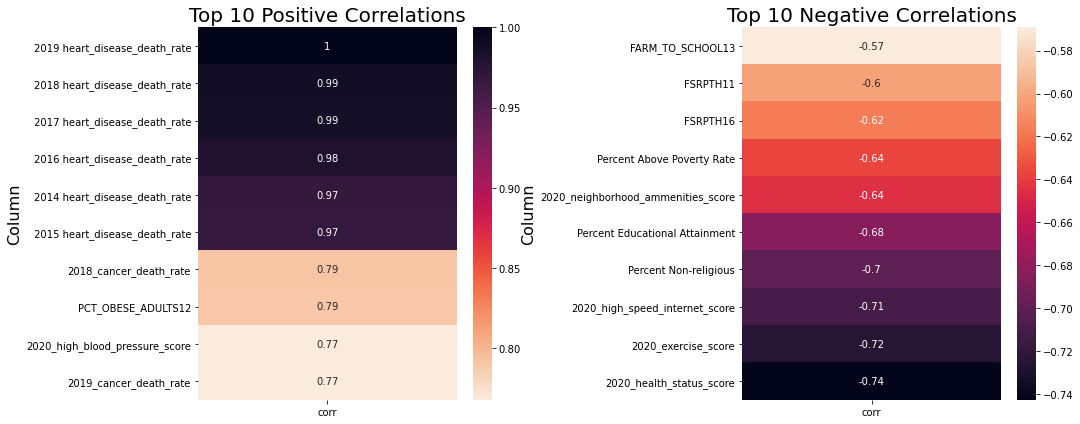

In [42]:
fig, (ax, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax = plt.subplot(1, 2, 1)
ax = sns.heatmap(data=heart_disease_corr.sort_values(by='corr', ascending=False)[:10],
                 annot=True,
                 cmap='rocket_r')
ax.set_title('Top 10 Positive Correlations', size=20)
ax.set_ylabel('Column', size=16)
ax2 = plt.subplot(1, 2, 2)
ax2 = sns.heatmap(data=heart_disease_corr.sort_values(by='corr', ascending=False)[-10:],
                  annot=True,
                  cmap='rocket')
ax2.set_title('Top 10 Negative Correlations', size=20)
ax2.set_ylabel('Column', size=16)
fig.tight_layout()

plt.savefig('charts/heartdisease_corr.png', bbox_inches='tight');

In [43]:
heart_disease_corr.drop(index=['2019 heart_disease_death_rate'], inplace=True)
features = list(heart_disease_corr.index)

In [44]:
X = df[features]

In [45]:
poly = PolynomialFeatures(degree=3, interaction_only=True, include_bias=False)
X_poly = poly.fit_transform(X)

X_poly = pd.DataFrame(data=X_poly, columns = poly.get_feature_names(features))
X_poly['2019 heart_disease_death_rate'] = y

In [46]:
# getting only highest correlated features from our new polynomial X_poly
hd_corr_poly = X_poly.corr()['2019 heart_disease_death_rate']

hd_corr_poly_dict = {}
for index, corr in hd_corr_poly.items():
    if corr > 0.90 or corr < -0.735:
        hd_corr_poly_dict[index] = corr
        
hd_corr_poly_df = pd.DataFrame(hd_corr_poly_dict.items(), columns=['Id', 'corr']).set_index('Id')
hd_corr_poly_df.sort_values(by='corr', ascending=False)

,corr
Id,
2019_cancer_death_rate,1.000000
2019 heart_disease_death_rate,1.000000
2019_cancer_death_rate 2015_cancer_death_rate,0.991937
2019_cancer_death_rate 2014_cancer_death_rate,0.991445
2019_cancer_death_rate 2017_cancer_death_rate,0.991198
...,...
2018 heart_disease_death_rate 2016 heart_disease_death_rate 2020_neighborhood_ammenities_score,-0.765818
2016 heart_disease_death_rate 2014 heart_disease_death_rate 2020_neighborhood_ammenities_score,-0.767070
2020_high_blood_pressure_score 2020_high_cholesterol_score 2020_neighborhood_ammenities_score,-0.779605


In [47]:
hd_corr_poly_df.drop(index='2019 heart_disease_death_rate', inplace=True)
features = list(hd_corr_poly_df.index)

## Heart Disease Death Rates - Modeling

In [48]:
# heart disease models
X = X_poly[features]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

sc = StandardScaler()
Z_train = sc.fit_transform(X_train)
Z_test = sc.transform(X_test)

In [49]:
count2 = 0
model_params2 = {}

In [50]:
lr = LinearRegression()

params = {
    'normalize': ['True', 'False']
}

model_df2, grid_estimator_lr, count2 = modeling_grid(lr, Z_train, Z_test, y_train, y_test, params, 5, model_params2, count2)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [51]:
print(count2)

model_df2

1


,estimator,normalize,score,test_rmse,test_score,train_rmse,train_score
model_1,LinearRegression(),True,0.988817,0.43124,0.99819,0.0,1.0


In [52]:
# transforming using PCA
pca = PCA(n_components=6, random_state=42)
P_train = pca.fit_transform(Z_train)
P_test = pca.transform(Z_test)

# instantiating and fitting a Linear Regression model
ols = LinearRegression()

params = {
    'normalize': ['True', 'False']
}

model_df2, grid_estimator_ols, count2 = modeling_grid(ols, P_train, P_test, y_train, y_test, params, 5, model_params2, count2)


Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


In [53]:
print(count2)

model_df2

2


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse
model_1,True,LinearRegression(),1.0,0.99819,0.988817,0.0,0.43124
model_2,True,LinearRegression(),0.972366,0.973551,0.909956,2.446269,1.648441


In [54]:
dt = DecisionTreeRegressor()

params = {
    'max_depth': [None, 5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4]
}

model_df2, grid_estimator_dt, count2 = modeling_grid(dt, Z_train, Z_test, y_train, y_test, params, 5, model_params2, count2)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 135 out of 135 | elapsed:    0.4s finished


In [55]:
print(count2)

model_df2

3


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse,max_depth,min_samples_leaf,min_samples_split
model_1,True,LinearRegression(),1.0,0.99819,0.988817,0.0,0.43124,NaN,NaN,NaN
model_2,True,LinearRegression(),0.972366,0.973551,0.909956,2.446269,1.648441,NaN,NaN,NaN
model_3,NaN,DecisionTreeRegressor(),0.984408,0.88921,0.833966,1.837524,3.373798,None,3,2


In [56]:
bag = BaggingRegressor()

params = {
    'n_estimators': [35, 40, 45],
    'max_samples': [0.1, 0.25, 0.5, 1.0],
    'max_features': [0.1, 0.25, 0.5, 1.0]
}

model_df2, grid_estimator_bag, count2 = modeling_grid(bag, Z_train, Z_test, y_train, y_test, params, 5, model_params2, count2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:   17.2s finished


In [57]:
print(count2)

model_df2

4


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse,max_depth,min_samples_leaf,min_samples_split,max_features,max_samples,n_estimators
model_1,True,LinearRegression(),1.0,0.99819,0.988817,0.0,0.43124,NaN,NaN,NaN,NaN,NaN,NaN
model_2,True,LinearRegression(),0.972366,0.973551,0.909956,2.446269,1.648441,NaN,NaN,NaN,NaN,NaN,NaN
model_3,NaN,DecisionTreeRegressor(),0.984408,0.88921,0.833966,1.837524,3.373798,None,3,2,NaN,NaN,NaN
model_4,NaN,BaggingRegressor(),0.991213,0.955748,0.868737,1.379428,2.132242,NaN,NaN,NaN,0.5,1.0,40


In [58]:
rf = RandomForestRegressor()

params = {
    'n_estimators': [25, 35, 45],
    'max_depth': [5, 7],
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [2, 3, 4]
}


model_df2, grid_estimator_rf, count2 = modeling_grid(rf, Z_train, Z_test, y_train, y_test, params, 5, model_params2, count2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 54 candidates, totalling 270 fits


[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:   16.5s finished


In [59]:
print(count2)

model_df2

5


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse,max_depth,min_samples_leaf,min_samples_split,max_features,max_samples,n_estimators
model_1,True,LinearRegression(),1.0,0.99819,0.988817,0.0,0.43124,NaN,NaN,NaN,NaN,NaN,NaN
model_2,True,LinearRegression(),0.972366,0.973551,0.909956,2.446269,1.648441,NaN,NaN,NaN,NaN,NaN,NaN
model_3,NaN,DecisionTreeRegressor(),0.984408,0.88921,0.833966,1.837524,3.373798,None,3,2,NaN,NaN,NaN
model_4,NaN,BaggingRegressor(),0.991213,0.955748,0.868737,1.379428,2.132242,NaN,NaN,NaN,0.5,1.0,40
model_5,NaN,RandomForestRegressor(),0.98218,0.972889,0.874698,1.964407,1.668939,7,2,3,NaN,NaN,25


In [60]:
lasso = LassoCV(max_iter=50000)

params = {
    'n_alphas': [65, 75, 80],
    'normalize': ['True', 'False'],
    'tol': np.linspace(0.01, 0.2, 5)
}


model_df2, grid_estimator_lasso, count = modeling_grid(lasso, Z_train, Z_test, y_train, y_test, params, 5, model_params2, count2)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 5 folds for each of 30 candidates, totalling 150 fits


[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:    5.8s finished


In [61]:
print(count2)

model_df2

5


,normalize,estimator,train_score,test_score,score,train_rmse,test_rmse,max_depth,min_samples_leaf,min_samples_split,max_features,max_samples,n_estimators,n_alphas,tol
model_1,True,LinearRegression(),1.0,0.99819,0.988817,0.0,0.43124,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_2,True,LinearRegression(),0.972366,0.973551,0.909956,2.446269,1.648441,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
model_3,NaN,DecisionTreeRegressor(),0.984408,0.88921,0.833966,1.837524,3.373798,None,3,2,NaN,NaN,NaN,NaN,NaN
model_4,NaN,BaggingRegressor(),0.991213,0.955748,0.868737,1.379428,2.132242,NaN,NaN,NaN,0.5,1.0,40,NaN,NaN
model_5,NaN,RandomForestRegressor(),0.98218,0.972889,0.874698,1.964407,1.668939,7,2,3,NaN,NaN,25,NaN,NaN
model_6,True,LassoCV(max_iter=50000),0.999999,0.999999,0.999999,0.014716,0.010148,NaN,NaN,NaN,NaN,NaN,NaN,65,0.01


### Analysis:
 
The LassoCV model again was our best model, with a near perfect score so we will use it to make our predictions.

## HD Predictions

In [62]:
hd_preds = grid_estimator_lasso.predict(Z_test)

hd_comparison = pd.DataFrame(y_test)
hd_comparison['preds'] = hd_preds

hd_comparison.sort_values(by='preds')

,2019_cancer_death_rate,preds
4,131.6,131.617622
30,131.9,131.917322
25,140.9,140.908322
19,144.4,144.404822
45,144.9,144.904322
26,147.4,147.401822
48,149.6,149.599622
12,151.9,151.897322
32,152.0,151.997222
37,153.5,153.495722


In [63]:
hd_coefs = (grid_estimator_lasso.coef_)**2

hd_coefs_df = pd.DataFrame(features)
hd_coefs_df['coefs'] = hd_coefs

hd_coefs_df.sort_values(by='coefs',
                        ascending=False)

,0,coefs
0,2019_cancer_death_rate,216.118538
361,2018_cancer_death_rate 2017_cancer_death_rate ...,0.000000
359,2018_cancer_death_rate 2017_cancer_death_rate ...,0.000000
358,2018_cancer_death_rate 2017_cancer_death_rate ...,0.000000
357,2019_cancer_death_rate Percent Above Poverty R...,0.000000
...,...,...
170,PCT_OBESE_ADULTS12 2019_cancer_death_rate 2018...,0.000000
169,PCT_OBESE_ADULTS12 PCT_OBESE_ADULTS14 2020_nei...,0.000000
168,PCT_OBESE_ADULTS12 PCT_OBESE_ADULTS14 2020_exe...,0.000000
167,PCT_OBESE_ADULTS12 PCT_OBESE_ADULTS14 2016_can...,0.000000


## Conclusions & Final Analysis

We were able to get both of our models predictions near 100% accuracy, but definitely had better scores in our heart disease models than our cancer models. LassoCV performed best out of all our models for both cancer and heart disease. We needed to use about 3x as many features for our cancer model to get the best scores, than for our heart disease model. Our heart disease death rate model achieved a 0.9999 CV score for LassoCV, where our cancer death rate model achieved a 0.8755 CV score for LassoCV. Our testing RMSE for heart disease came down to 0.013, and our cancer testing RMSE came down to 1.41, both very close to 0.

We found that although we were able to predict these death rates with near perfect accuracy, they didn't tell us as much about the features and their relationship with cancer and heart disease death rates because the death rates of past years overshadowed the other features.

We decided to remove these death rates for our future models, to focus more on the other features and to be able to highlight any interesting relationships.